# Bounding Box Distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import string


In [2]:
## read in data info
bbx_list = pd.read_csv(f'/home/gridsan/vdutell/RosenholtzLab_shared/cocop_bbx_fixations.csv')
bbx_list

,image_name,object_name,index,bbx_x_16,bbx_y_16,bbx_w_16,bbx_h_16,used,imsize_x_16,imsize_y_16,...,fx_x_22_5,fx_y_22_5,fx_x_16_10,fx_y_16_10,fx_x_22_10,fx_y_22_10,fx_x_16_15,fx_y_16_15,fx_x_22_15,fx_y_22_15
0,000000529762.jpg,wine glass,4,409,167,101,228,1,640,480,...,525.593651,355.543655,305.536727,235.733855,420.187302,324.087310,228.805091,213.100782,314.780954,292.630965
1,000000532761.jpg,potted plant,5,117,191,65,46,1,640,480,...,313.731562,310.656750,307.182004,238.051065,422.463125,327.313500,386.273005,250.076597,531.194687,343.970250
2,000000535608.jpg,umbrella,1,306,158,123,32,1,500,376,...,395.758072,251.891905,208.133290,193.009692,286.516144,264.783809,128.699935,202.514538,177.274216,277.675714
3,000000537153.jpg,bench,3,399,363,68,28,1,640,396,...,537.090377,425.104056,347.589561,241.703818,478.180754,332.208113,304.884341,174.055727,419.271132,239.312169
4,000000537270.jpg,cup,7,540,230,76,82,1,640,480,...,684.766124,359.040049,419.142621,251.912485,575.532248,346.080097,339.713932,242.368728,466.298372,333.120146
5,000000537355.jpg,fire hydrant,1,263,278,23,54,1,640,428,...,426.877902,320.455844,346.181149,162.206857,475.755803,221.911687,382.271724,90.810285,524.633705,123.367531
6,000000543581.jpg,cat,4,486,318,144,85,1,640,427,...,673.415984,437.189690,421.872320,275.921139,579.831968,379.379381,353.808481,233.881709,486.247951,321.569071
7,000000545958.jpg,cow,1,380,261,192,135,1,640,428,...,565.506261,386.663501,346.817420,233.597346,477.012521,321.327002,282.226131,186.396019,388.518782,255.990503
8,000000555009.jpg,mouse,6,393,270,59,56,1,500,375,...,487.343016,349.715235,287.564023,211.241899,394.686033,290.430470,220.346035,167.862848,302.029049,231.145705
9,000000557916.jpg,teddy bear,3,109,89,77,94,1,640,426,...,303.255884,231.263205,293.174984,201.060542,403.511768,276.526410,366.262476,233.590813,503.767652,321.789615


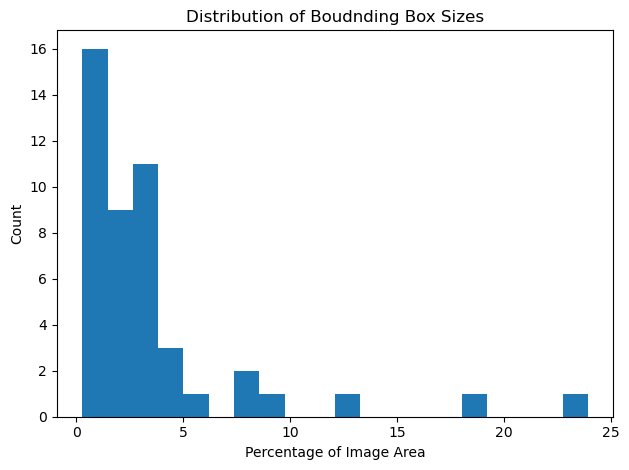

In [26]:
bbx_list['bbx_area'] = bbx_list['bbx_w_16']*bbx_list['bbx_h_16']
bbx_list['img_area'] = bbx_list['imsize_x_16']*bbx_list['imsize_y_16']
ims = np.array(bbx_list['img_area'])
bbas = np.array(bbx_list['bbx_area'])
bbas_relative = bbas/ims * 100.
#plt.plot(bbas,bbas_relative,'.')
plt.hist(bbas_relative,bins=20)
plt.title("Distribution of Boudnding Box Sizes")
plt.ylabel('Count')
plt.xlabel('Percentage of Image Area')
plt.tight_layout()

In [31]:
bbx_list[['image_name','bbx_area']].sort_values('bbx_area')

,image_name,bbx_area
39,000000391290.jpg,779
14,000000577864.jpg,783
12,000000569059.jpg,840
11,000000562581.jpg,989
15,000000577932.jpg,1148
30,000000263594.jpg,1230
5,000000537355.jpg,1242
3,000000537153.jpg,1904
19,000000067616.jpg,1914
41,000000396580.jpg,2166
